# Proyek Analisis Data: Kualitas Udara Beijing, Tiongkok


## Menentukan Pertanyaan Bisnis

- Bagaimana Kualitas udara di setiap provinsi / station dari tahun ke tahun ?
- Bagaimana kadar polutan yang tersebar, serta dari mana sumber nya ?
- Apa korelasi antara arah angin dengan  kualitas udara ?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load Data tiap provinsi

In [2]:
Aoutizhongxin_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
Aoutizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
Changping_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
Dingling_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
Dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
Dongsi_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [6]:
Guanyuan_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
Guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [7]:
Guncheng_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
Guncheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [8]:
Huairou_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
Huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [9]:
Nongzhanguan_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
Nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [10]:
Shunyi_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
Shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [11]:
Tiantan_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
Tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [12]:
Wanliu_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
Wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [13]:
Wanshouxigong_df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
Wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Data masih terpisah berdasarkan station atau daerah
- Data kualitas air secara umum tebagi menjadi 2, yaitu berdasarkan polusi dan lingkungan

### Assessing Data

Menilai tabel Aoutizhongxin_df

In [14]:
Aoutizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
Aoutizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [16]:
Aoutizhongxin_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         633
SO2          330
NO2          465
CO           112
O3           831
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64

In [17]:
Aoutizhongxin_df.duplicated().sum()

0

In [18]:
Aoutizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


---

Menilai data Changping_df

In [19]:
Changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
Changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [21]:
Changping_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

In [22]:
Changping_df.duplicated().sum()

0

In [23]:
Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


---

Menilai data Dingling_df

In [24]:
Dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
Dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [26]:
Dingling_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

In [27]:
Dingling_df.duplicated().sum()

0

In [28]:
Dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


---

Menilai data Dongsi_df

In [29]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [30]:
Dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [31]:
Dongsi_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        582
PM10         666
SO2          392
NO2          701
CO           115
O3           737
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [32]:
Dongsi_df.duplicated().sum()

0

In [33]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


---

Menilai data Guanyuan_df

In [34]:
Guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [35]:
Guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [36]:
Guanyuan_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        557
PM10         630
SO2          280
NO2          376
CO           117
O3           767
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64

In [37]:
Guanyuan_df.duplicated().sum()

0

In [38]:
Guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


---

Menilai data Guncheng_df

In [39]:
Guncheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
Guncheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [41]:
Guncheng_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        577
PM10         660
SO2          243
NO2          367
CO           116
O3           804
TEMP         995
PRES         592
DEWP         594
RAIN         125
wd            16
WSPM         101
station        1
dtype: int64

In [42]:
Guncheng_df.duplicated().sum()

0

In [43]:
Guncheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


---

Menilai data Huairou_df

In [44]:
Huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [45]:
Huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [46]:
Huairou_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        479
PM10         556
SO2          247
NO2          296
CO           108
O3           812
TEMP        1012
PRES         589
DEWP         617
RAIN         128
wd            16
WSPM         105
station        1
dtype: int64

In [47]:
Huairou_df.duplicated().sum()

0

In [48]:
Huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


---

Menilai data Shunyi_df

In [49]:
Shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [50]:
Shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [51]:
Shunyi_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        567
PM10         605
SO2          267
NO2          517
CO           115
O3           961
TEMP         985
PRES         602
DEWP         608
RAIN         120
wd            16
WSPM         103
station        1
dtype: int64

In [52]:
Shunyi_df.duplicated().sum()

0

In [53]:
Shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


---

Menilai data Tiantan_df

In [54]:
Tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [55]:
Tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [56]:
Tiantan_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         640
SO2          259
NO2          319
CO           117
O3           678
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [57]:
Tiantan_df.duplicated().sum()

0

In [58]:
Tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


---

Menilai data Wanliu_df

In [59]:
Wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [60]:
Wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [61]:
Wanliu_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        539
PM10         616
SO2          460
NO2          958
CO           120
O3           734
TEMP         971
PRES         593
DEWP         600
RAIN         125
wd            16
WSPM          86
station        1
dtype: int64

In [62]:
Wanliu_df.duplicated().sum()

0

In [63]:
Wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


---

Menilai data Wanshouxigong_df

In [64]:
Wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [65]:
Wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [66]:
Wanshouxigong_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        585
PM10         648
SO2          279
NO2          422
CO           116
O3           716
TEMP         965
PRES         607
DEWP         608
RAIN         121
wd            16
WSPM          96
station        1
dtype: int64

In [67]:
Wanshouxigong_df.duplicated().sum()

0

In [68]:
Wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- Dari keseluhan data terdapat missing value yang sama, yaitu: PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN, WSPM dan wd
- xxx

### Cleaning Data

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN, WSPM dan wd pada dataset Aoutizhongxin_df diganti dengan nilai rata - rata

In [69]:
mv = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in mv:
    Aoutizhongxin_df[col] = Aoutizhongxin_df[col].fillna(Aoutizhongxin_df[col].mean())

In [70]:
Aoutizhongxin_df.wd = Aoutizhongxin_df.wd.fillna('NE')

In [71]:
Aoutizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN, WSPM dan wd pada dataset Changping_df diganti dengan nilai rata - rata

In [72]:
mv = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in mv:
    Changping_df[col] = Changping_df[col].fillna(Changping_df[col].mean())

In [73]:
Changping_df.wd = Changping_df.wd.fillna('NNW')

In [74]:
Changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Dingling_df diganti dengan nilai rata - rata

In [75]:
mv = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in mv:
    Dingling_df[col] = Dingling_df[col].fillna(Dingling_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [76]:
Dingling_df.wd = Dingling_df.wd.fillna('NNW')

In [77]:
Dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Dongsi_df diganti dengan nilai rata - rata

In [78]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Dongsi_df[col] = Dongsi_df[col].fillna(Dongsi_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [79]:
Dongsi_df.wd = Dongsi_df.wd.fillna('ENE')

In [80]:
Dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Guanyuan_df diganti dengan nilai rata - rata

In [81]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Guanyuan_df[col] = Guanyuan_df[col].fillna(Guanyuan_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [82]:
Guanyuan_df.wd = Guanyuan_df.wd.fillna('NE')

In [83]:
Guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Guncheng_df diganti dengan nilai rata - rata

In [84]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Guncheng_df[col] = Guncheng_df[col].fillna(Guncheng_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [85]:
Guncheng_df.wd = Guncheng_df.wd.fillna('N')

In [86]:
Guncheng_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Huairou_df diganti dengan nilai rata - rata

In [87]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Huairou_df[col] = Huairou_df[col].fillna(Huairou_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [88]:
Huairou_df.wd = Huairou_df.wd.fillna('NW')

In [89]:
Huairou_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Nongzhanguan_df diganti dengan nilai rata - rata

In [90]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Nongzhanguan_df[col] = Nongzhanguan_df[col].fillna(Nongzhanguan_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [91]:
Nongzhanguan_df.wd = Nongzhanguan_df.wd.fillna('ENE')

In [92]:
Nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Shunyi_df diganti dengan nilai rata - rata

In [93]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Shunyi_df[col] = Shunyi_df[col].fillna(Shunyi_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [94]:
Shunyi_df.wd = Shunyi_df.wd.fillna('NNE')

In [95]:
Shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Tiantan_df diganti dengan nilai rata - rata

In [96]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Tiantan_df[col] = Tiantan_df[col].fillna(Tiantan_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [97]:
Tiantan_df.wd = Tiantan_df.wd.fillna('ENE')

In [98]:
Tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Wanliu_df diganti dengan nilai rata - rata

In [99]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Wanliu_df[col] = Wanliu_df[col].fillna(Wanliu_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [100]:
Wanliu_df.wd = Wanliu_df.wd.fillna('NE')

In [101]:
Wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Data missing value PM2.5,PM10,SO2, NO2,CO, O3, TEMP, PRES, DEWP, RAIN dan WSPM pada dataset Wanshouxigong_df diganti dengan nilai rata - rata

In [102]:
column = ['PM2.5','PM10','SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in column:
    Wanshouxigong_df[col] = Wanshouxigong_df[col].fillna(Wanshouxigong_df[col].mean())

Data missing value WD diganti dengan nilai terbanyak

In [103]:
Wanshouxigong_df.wd = Wanshouxigong_df.wd.fillna('NE')

In [104]:
Wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

---

Menyatukan setiap data per provinsi menjadi satu

In [105]:
all_df = pd.concat([Aoutizhongxin_df, Changping_df, Dingling_df,
                    Dongsi_df, Guanyuan_df, Guncheng_df,Huairou_df,
                    Nongzhanguan_df,Shunyi_df, Tiantan_df, Wanliu_df, Wanshouxigong_df], ignore_index= True)

Fungsi untuk mengubah singkatan arah angin menjadi nama lengkap

In [106]:
def expand_wind_direction(wd):
    wind_dir_map = {
        'N': 'North',
        'NNE': 'North-Northeast',
        'NE': 'Northeast',
        'ENE': 'East-Northeast',
        'E': 'East',
        'ESE': 'East-Southeast',
        'SE': 'Southeast',
        'SSE': 'South-Southeast',
        'S': 'South',
        'SSW': 'South-Southwest',
        'SW': 'Southwest',
        'WSW': 'West-Southwest',
        'W': 'West',
        'WNW': 'West-Northwest',
        'NW': 'Northwest',
        'NNW': 'North-Northwest'
    }
    return wind_dir_map.get(wd, wd) 

Membuatan data tanggal / Date time

In [107]:
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day']])

Menyimpan data yang sudah satukan dalam format csv

In [108]:
all_df.to_csv('All Data PRSA (Air Quality).csv', index= False)

**Insight:**
- Penambahan data Date time 
- Ada kekurangan data yaitu tidak ada  nya data sumber penyumbang polutan
- Data frame yang terpisah dijadikan satu dan disimpan dengn nama file All Data PRSA (Air Quality).csv untuk mempermudah EDA

## Exploratory Data Analysis (EDA)

### Explore ...

Menilai rata - rata partikulat halus PM2.5 dan PM 10 provinsi negara per tahunnya

In [109]:
bystation_PM = all_df.groupby(['station','year']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean'
}).sort_values(['station', 'year'], ascending=[True,True])
bystation_PM

PM2.5        PM10
station       year                        
Aotizhongxin  2013   82.393043  112.913167
              2014   90.333581  121.389921
              2015   82.134578  112.035381
              2016   74.279022   94.842749
              2017   94.626679  107.357984
Changping     2013   72.637567   91.257159
              2014   79.144216  106.318472
              2015   69.672148   94.153708
              2016   61.778503   86.422490
              2017   80.012286   94.364091
Dingling      2013   64.777450   78.763031
              2014   73.949575   90.358112
              2015   64.627529   85.350134
              2016   60.042212   80.514580
              2017   68.350216   78.650888
Dongsi        2013   86.925760  105.018146
              2014   87.455485  116.939118
              2015   87.326436  111.840239
              2016   80.465800  103.282334
              2017  103.130529  131.536060
Guanyuan      2013   82.140551  107.772775
              2014   88.255731  115.736635
              2015   82.418859  106.370617
              2016   77.228560  104.738905
              2017   92.691009  116.965939
Gucheng       2013   82.035115  112.600537
              2014   89.139820  133.565039
              2015   83.631204  116.261947
              2016   77.530704  110.793668
              2017  101.143993  126.512784
Huairou       2013   68.715264   94.680239
              2014   77.011450   99.889143
              2015   70.635958   89.425734
              2016   61.277062   82.391200
              2017   74.212586   92.016072
Nongzhanguan  2013   84.350177  103.845434
              2014   90.185522  125.105613
              2015   85.932337  107.457277
              2016   76.155790   97.038275
              2017  101.386979  119.624149
Shunyi        2013   77.280065   94.662433
              2014   84.472716  110.799902
              2015   81.250064   99.689977
              2016   72.051435   87.816802
              2017   95.421874  107.090435
Tiantan       2013   83.197686  108.253070
              2014   86.433097  114.227999
              2015   82.600319  103.048920
              2016   74.035380   97.231196
              2017   98.140631  125.071071
Wanliu        2013   91.572150  112.282788
              2014   89.410417  130.078648
              2015   80.585911  106.780609
              2016   71.561885   92.986175
              2017   94.052080  110.910239
Wanshouxigong 2013   84.033836  111.315051
              2014   88.980393  125.725547
              2015   84.722278  110.966341
              2016   78.686672   99.097157
              2017  106.866296  122.609645

Menilai rata - rata kandungan polutan disetiap provinsi per tahun nya

In [110]:
DistributionofPolution_df = all_df.groupby(['station', 'year']).agg({
    'PM2.5' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean'
}).sort_values(by=['station', 'PM2.5'], ascending=[True, False])
DistributionofPolution_df

PM2.5        SO2        NO2           CO         O3
station       year                                                          
Aotizhongxin  2017   94.626679  20.791767  66.215968  1668.531169  47.573536
              2014   90.333581  21.097476  63.742087  1194.545994  49.941810
              2013   82.393043  23.493029  63.390231  1187.527588  50.221417
              2015   82.134578  14.407922  60.937350  1395.649081  63.748528
              2016   74.279022  10.959400  48.725888  1196.488727  61.914457
Changping     2017   80.012286  16.417615  50.947550  1524.400162  33.400410
              2014   79.144216  20.958338  45.557611  1195.430974  63.080795
              2013   72.637567  19.231476  41.251464  1052.052075  61.399195
              2015   69.672148  11.841341  42.799284  1161.859538  57.912187
              2016   61.778503   8.277616  45.548925  1123.589296  53.904720
Dingling      2014   73.949575  14.458873  27.362325   877.656411  72.515434
              2017   68.350216  13.250526  34.387971  1151.824317  53.948925
              2013   64.777450  14.032211  29.890448   852.777553  65.187935
              2015   64.627529  11.351143  26.881813   966.453378  70.953036
              2016   60.042212   7.294931  25.486036   874.441321  67.357060
Dongsi        2017  103.130529  20.405056  57.933326  1575.439513  39.780815
              2014   87.455485  23.790487  55.582203  1367.693735  57.245953
              2015   87.326436  15.218665  50.372735  1335.668400  55.796035
              2013   86.925760  23.917829  57.598815  1335.308738  63.489913
              2016   80.465800  11.783750  51.196804  1243.028459  56.145993
Guanyuan      2017   92.691009  21.291314  64.996295  1489.765711  45.942674
              2014   88.255731  22.977106  63.727391  1351.308925  55.262818
              2015   82.418859  14.112923  54.957516  1314.617354  56.758876
              2013   82.140551  21.833994  58.274188  1197.387065  58.196017
              2016   77.228560  11.544032  53.572748  1174.867143  54.945471
Gucheng       2017  101.143993  20.598720  62.485696  1782.372249  29.261502
              2014   89.139820  19.728978  62.032592  1420.910931  58.803854
              2015   83.631204  13.375146  49.902143  1324.927073  60.666683
              2013   82.035115  17.647788  61.356659  1299.579201  56.117613
              2016   77.530704  10.249753  50.026417  1172.853995  59.527469
Huairou       2014   77.011450  17.410516  37.240045  1062.548587  67.009783
              2017   74.212586   9.791628  38.878500  1312.968830  46.723178
              2015   70.635958   8.752582  28.474908  1041.465967  60.177105
              2013   68.715264  16.720585  36.014181  1006.491690  61.061847
              2016   61.277062   6.737304  27.809710   930.424207  53.385516
Nongzhanguan  2017  101.386979  20.659014  58.386465  1696.858939  36.882272
              2014   90.185522  24.437320  61.958084  1336.974058  59.567559
              2015   85.932337  15.913632  58.506678  1377.260118  61.217834
              2013   84.350177  23.238118  59.624706  1306.107784  56.309899
              2016   76.155790  11.604206  52.514671  1214.198103  60.179288
Shunyi        2017   95.421874  21.125712  55.476500  1749.532339  42.220353
              2014   84.472716  17.380501  45.530298  1166.841285  58.348535
              2015   81.250064  10.540498  43.226413  1180.508108  52.165830
              2013   77.280065  15.611348  41.643163  1230.697973  56.589601
              2016   72.051435   9.874575  43.001996  1086.617368  56.021769
Tiantan       2017   98.140631  14.021248  63.845862  1712.240207  36.041356
              2014   86.433097  19.094873  55.616533  1314.141234  56.976616
              2013   83.197686  18.183159  53.324068  1315.328358  54.440069
              2015   82.600319  11.883537  51.934627  1300.419445  60.070583
              2016   74.035380   8.996355  50.083009  1199.436747  55.425489
Wanliu        2017   

Klastering nilai PM 2.5

In [111]:
def PM25_categorical(PM25):
    if PM25 <=12:
        return 'Baik'
    if 12.1 <= PM25 <= 35.4:
        return 'Sedang'
    if 35.5 <= PM25 <= 55.4:
        return 'Tidak Sehat bagi kelompok sensitif'
    if 55.5 <= PM25 <= 150.4:
        return 'Tidak Sehat'
    if  150.5 <= PM25 <= 250.4:
        return 'Sangat  Tidak Sehat'
    else:
        return 'Berbahaya'

all_df['Klaster PM 2.5'] = all_df['PM2.5'].apply(PM25_categorical)
print(f"Jumlah Klaster {all_df['Klaster PM 2.5'].value_counts()}")
all_df[['station','PM2.5', 'Klaster PM 2.5']].sample(12).sort_values('PM2.5', ascending= False)




Jumlah Klaster Klaster PM 2.5
Tidak Sehat                           150979
Sedang                                 91096
Baik                                   62775
Tidak Sehat bagi kelompok sensitif     53248
Sangat  Tidak Sehat                    44234
Berbahaya                              18436
Name: count, dtype: int64


,station,PM2.5,Klaster PM 2.5
78562,Dingling,342.0,Berbahaya
104430,Dingling,295.0,Berbahaya
391053,Wanshouxigong,201.0,Sangat Tidak Sehat
194958,Gucheng,136.0,Tidak Sehat
390542,Wanshouxigong,104.0,Tidak Sehat
354679,Wanliu,94.0,Tidak Sehat
395888,Wanshouxigong,84.0,Tidak Sehat
169661,Guanyuan,75.0,Tidak Sehat
55320,Changping,75.0,Tidak Sehat
370361,Wanliu,54.0,Tidak Sehat bagi kelompok sensitif


In [112]:
clusteringPM25_by_station_perDt = all_df.groupby(['station', 'year']).agg({
    'PM2.5': 'mean',
    'Klaster PM 2.5' : lambda x: x.mode()[0]
}).reset_index()

clusteringPM25_by_station_perDt.sample(12)

,station,year,PM2.5,Klaster PM 2.5
3,Aotizhongxin,2016,74.279022,Tidak Sehat
1,Aotizhongxin,2014,90.333581,Tidak Sehat
35,Nongzhanguan,2013,84.350177,Tidak Sehat
55,Wanshouxigong,2013,84.033836,Tidak Sehat
45,Tiantan,2013,83.197686,Tidak Sehat
25,Gucheng,2013,82.035115,Tidak Sehat
22,Guanyuan,2015,82.418859,Tidak Sehat
37,Nongzhanguan,2015,85.932337,Tidak Sehat
28,Gucheng,2016,77.530704,Tidak Sehat
44,Shunyi,2017,95.421874,Baik


korelasi antara arah angin dengan  kualitas udara

In [113]:
# Ubah agregasi data
by_WindDirection_toPM25 = all_df.groupby(['station', 'year']).agg({
    'wd': lambda x: expand_wind_direction(x.mode()[0]),
    'PM2.5': 'mean',
}).reset_index().sort_values(['station', 'PM2.5'], ascending=[True, False])

# Tampilkan hasilnya
print(by_WindDirection_toPM25)

          station  year               wd       PM2.5
4    Aotizhongxin  2017        Northeast   94.626679
1    Aotizhongxin  2014        Northeast   90.333581
0    Aotizhongxin  2013        Northeast   82.393043
2    Aotizhongxin  2015   East-Northeast   82.134578
3    Aotizhongxin  2016        Northeast   74.279022
9       Changping  2017        Northwest   80.012286
6       Changping  2014  North-Northwest   79.144216
5       Changping  2013            North   72.637567
7       Changping  2015  North-Northwest   69.672148
8       Changping  2016  North-Northwest   61.778503
11       Dingling  2014  North-Northwest   73.949575
14       Dingling  2017        Northwest   68.350216
10       Dingling  2013            North   64.777450
12       Dingling  2015  North-Northwest   64.627529
13       Dingling  2016  North-Northwest   60.042212
19         Dongsi  2017        Northeast  103.130529
16         Dongsi  2014             East   87.455485
17         Dongsi  2015   East-Northeast   87.

In [114]:
by_WindDirection_toPM10 = all_df.groupby(['station', 'year']).agg({
    'wd': lambda x: expand_wind_direction(x.mode()[0]),
    'PM10': 'mean'
}).reset_index().sort_values(['station', 'PM10'], ascending=[True, False])

by_WindDirection_toPM10

,station,year,wd,PM10
1,Aotizhongxin,2014,Northeast,121.389921
0,Aotizhongxin,2013,Northeast,112.913167
2,Aotizhongxin,2015,East-Northeast,112.035381
4,Aotizhongxin,2017,Northeast,107.357984
3,Aotizhongxin,2016,Northeast,94.842749
6,Changping,2014,North-Northwest,106.318472
9,Changping,2017,Northwest,94.364091
7,Changping,2015,North-Northwest,94.153708
5,Changping,2013,North,91.257159
8,Changping,2016,North-Northwest,86.422490


**Insight:**
- Analisa kualitas udara berdasar data pada kota Beijing,  Cina, yang merupakan salah satu kota paling tercemar di dunia. Rata - rata PM 2.5  di Beijing adalah 71,5 μg/m3, yang jauh melebihi batas aman WHO dengan kota paling tercemar Wanshouxigong pada tahun 2017 mencapai 106 μg/m3
- Jenis Polutan yang mencapai batas aman adalah NO2, zat ini umum nya dihasilkan oleh Industri, kendaraanbermotor, pembakaran bahan bakar fosil, dan proses alami. Hal ini harus ada nya penanganan yang serius agar menurunkan kadar NO2
- Northeast menjadi pengaruh arah angin paling signifikan dalam mempengaruhi tinggi nya nilai partikulat halus

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana Kualitas udara di setiap provinsi / station dari tahun ke tahun ?



PM 2.5 dan PM 10

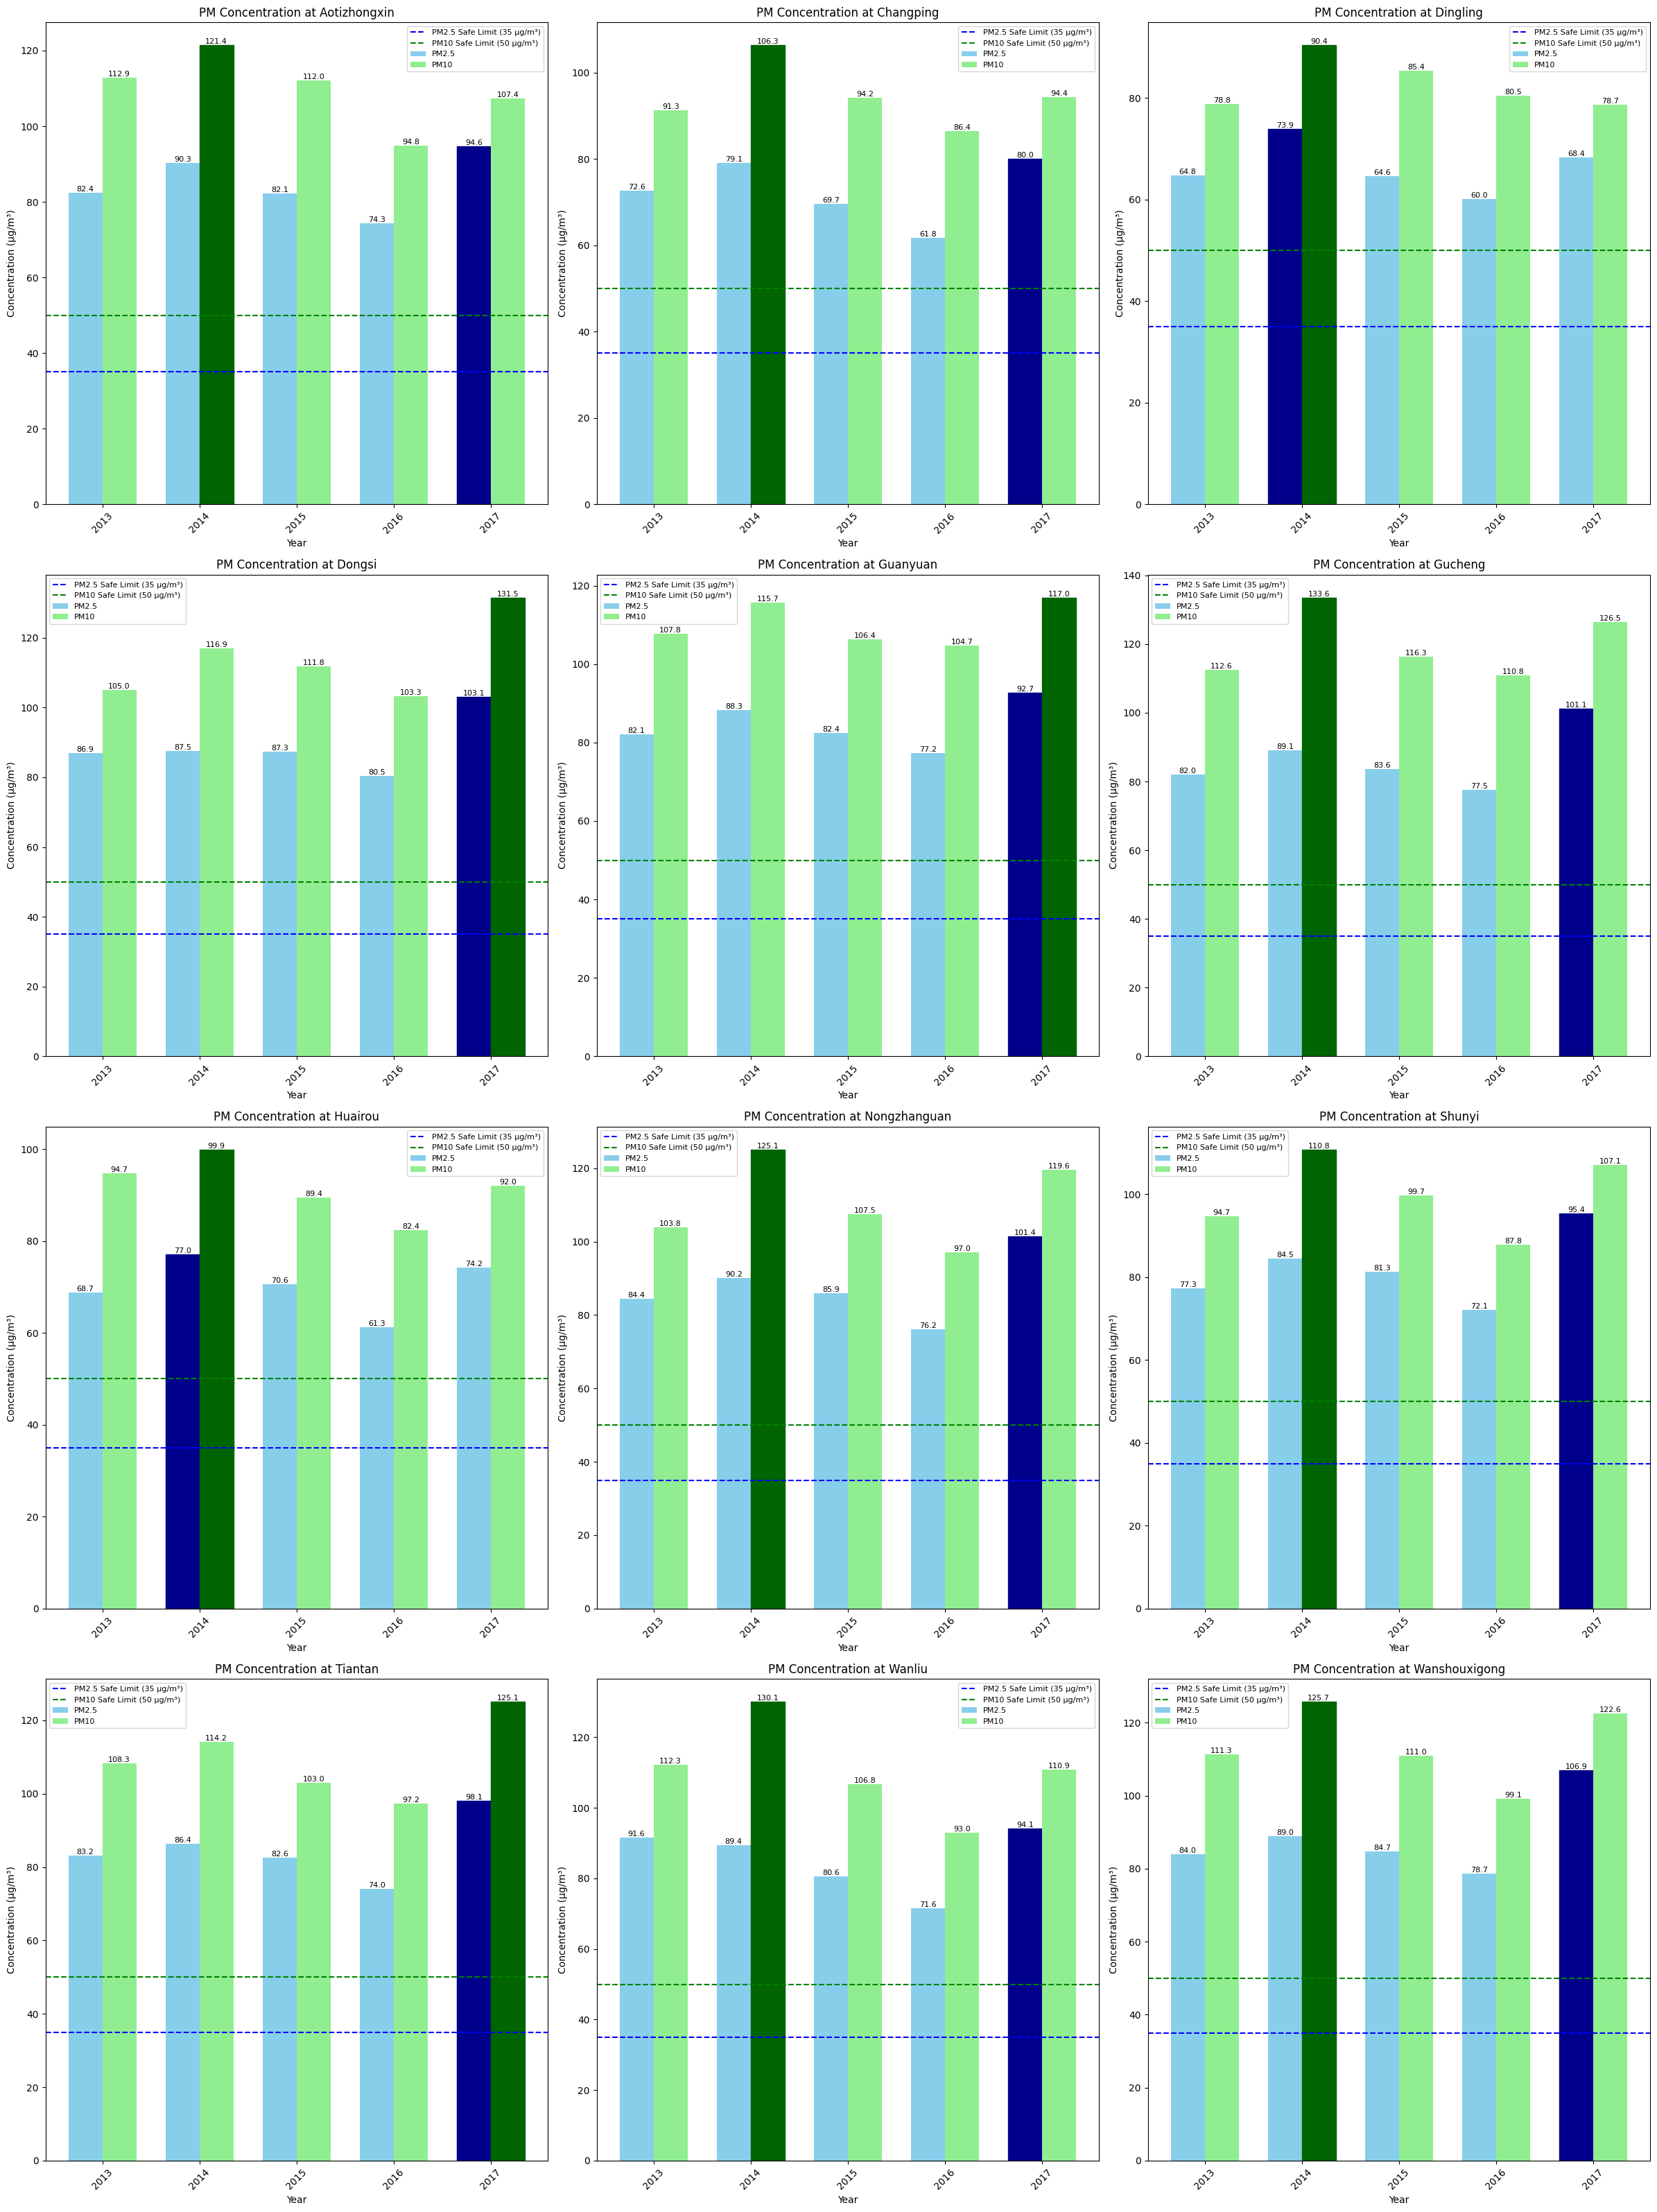

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

# Batas aman untuk PM2.5 dan PM10 (dalam µg/m³)
safe_limit_pm25 = 35
safe_limit_pm10 = 50

# Mendapatkan daftar unik stasiun
stations = bystation_PM.index.get_level_values('station').unique()

# Menghitung jumlah baris yang diperlukan
n_rows = math.ceil(len(stations) / 3)

# Membuat subplot grid dengan 3 kolom
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 8*n_rows))

# Meratakan array axes
axes = axes.flatten()

for i, station in enumerate(stations):
    ax = axes[i]
    
    # Data untuk stasiun tertentu
    station_data = bystation_PM.loc[station].reset_index().sort_values('year', ascending = True)
    
    # Menyiapkan data untuk plotting
    years = station_data['year']
    x = range(len(years))
    width = 0.35
    
    # Menentukan tahun dengan nilai tertinggi
    max_pm25_year = station_data.loc[station_data['PM2.5'].idxmax(), 'year']
    max_pm10_year = station_data.loc[station_data['PM10'].idxmax(), 'year']
    
    # Bar plot untuk PM2.5
    pm25_bars = ax.bar([i - width/2 for i in x], station_data['PM2.5'], width, label='PM2.5', color='skyblue')
    
    # Bar plot untuk PM10
    pm10_bars = ax.bar([i + width/2 for i in x], station_data['PM10'], width, label='PM10', color='lightgreen')
    
    # Menyorot warna untuk tahun dengan nilai tertinggi
    for j, year in enumerate(years):
        if year == max_pm25_year:
            pm25_bars[j].set_color('darkblue')
        if year == max_pm10_year:
            pm10_bars[j].set_color('darkgreen')
    
    # Menambahkan garis batas aman
    ax.axhline(y=safe_limit_pm25, color='blue', linestyle='--', label='PM2.5 Safe Limit (35 µg/m³)')
    ax.axhline(y=safe_limit_pm10, color='green', linestyle='--', label='PM10 Safe Limit (50 µg/m³)')
    
    ax.set_title(f'PM Concentration at {station}', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Concentration (µg/m³)', fontsize=10)
    ax.legend(fontsize=8)
    
    # Menambahkan nilai di atas setiap bar
    for j, v in enumerate(station_data['PM2.5']):
        ax.text(j - width/2, v, f'{v:.1f}', ha='center', va='bottom', fontsize=8)
    for j, v in enumerate(station_data['PM10']):
        ax.text(j + width/2, v, f'{v:.1f}', ha='center', va='bottom', fontsize=8)
    
    # Mengatur label sumbu x
    ax.set_xticks(x)
    ax.set_xticklabels(years, rotation=45)

# Menghapus subplot yang tidak terpakai
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Pertanyaan 2: - Bagaimana kadar polutan yang tersebar, serta dari mana sumber nya ?

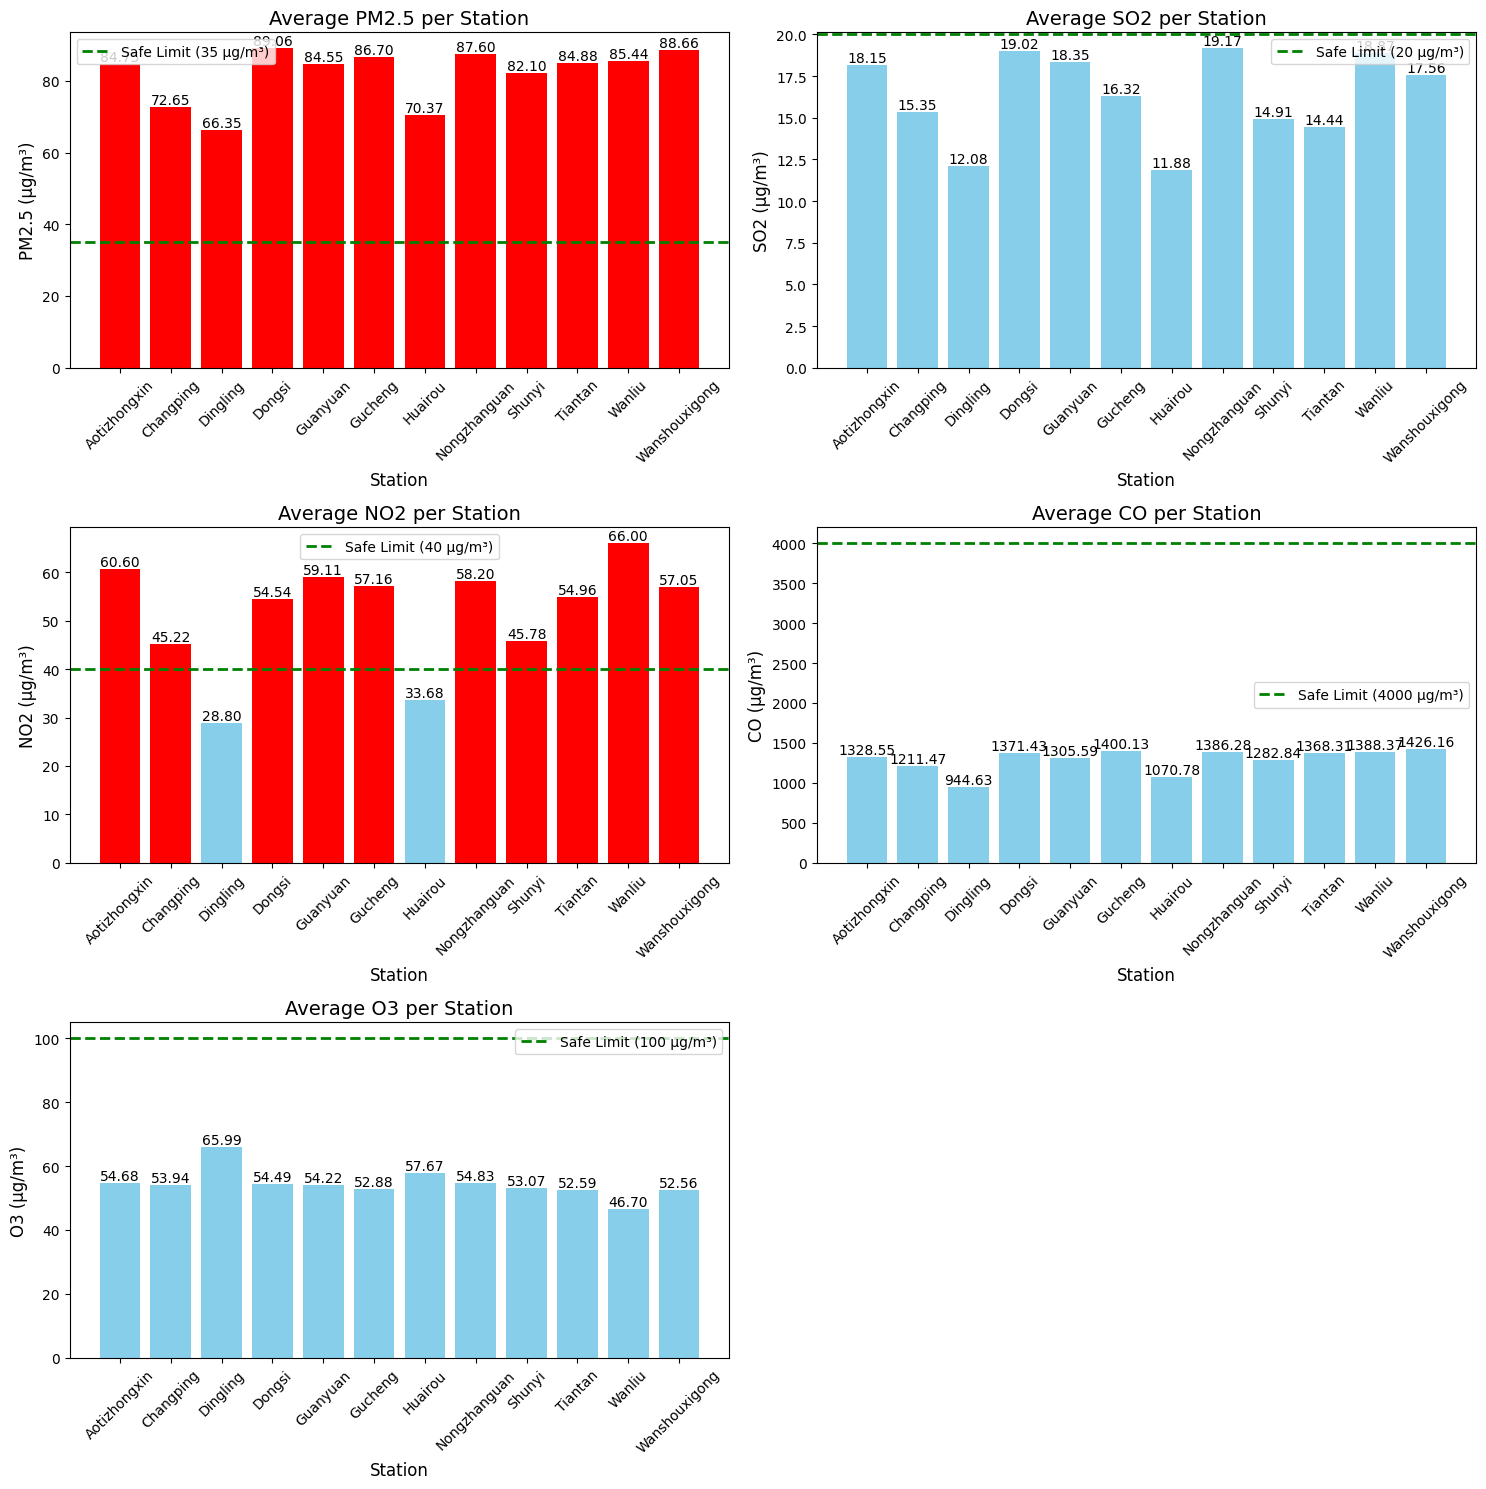

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat list untuk nama polutan yang akan diplot
pollutants = ['PM2.5', 'SO2', 'NO2', 'CO', 'O3']

# Batas aman untuk tiap polutan dalam satuan µg/m³
safe_limits = {
    'PM2.5': 35,
    'SO2': 20,
    'NO2': 40,
    'CO': 4000,  # CO dikonversi ke µg/m³
    'O3': 100
}

# Menghitung jumlah baris yang dibutuhkan
num_rows = (len(pollutants) + 1) // 2  # Pembulatan ke atas

# Membuat subplots grid dengan 2 kolom
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Meratakan array axes menjadi 1D untuk memudahkan iterasi
axes = axes.flatten()

# Looping untuk setiap polutan dan plot data
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    
    # Menghitung rata-rata untuk tiap stasiun
    avg_data = DistributionofPolution_df.groupby('station')[pollutant].mean()
    
    # Menentukan warna batang berdasarkan batas aman
    colors = ['skyblue' if val <= safe_limits[pollutant] else 'red' for val in avg_data]
    
    # Plot data rata-rata untuk tiap polutan
    bars = ax.bar(avg_data.index, avg_data.values, color=colors)
    
    # Menambahkan garis batas aman
    safe_limit = safe_limits[pollutant]
    ax.axhline(safe_limit, color='green', linestyle='--', linewidth=2, label=f'Safe Limit ({safe_limit} µg/m³)')
    
    ax.set_title(f'Average {pollutant} per Station', fontsize=14)
    ax.set_xlabel('Station', fontsize=12)
    ax.set_ylabel(f'{pollutant} (µg/m³)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Menambahkan nilai di atas setiap batang
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Menambahkan legend
    ax.legend()

# Menghapus subplot yang tidak digunakan (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Mengatur tata letak agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()

### Pertanyaan 3: - Apa korelasi antara arah angin dengan  kualitas udara ?

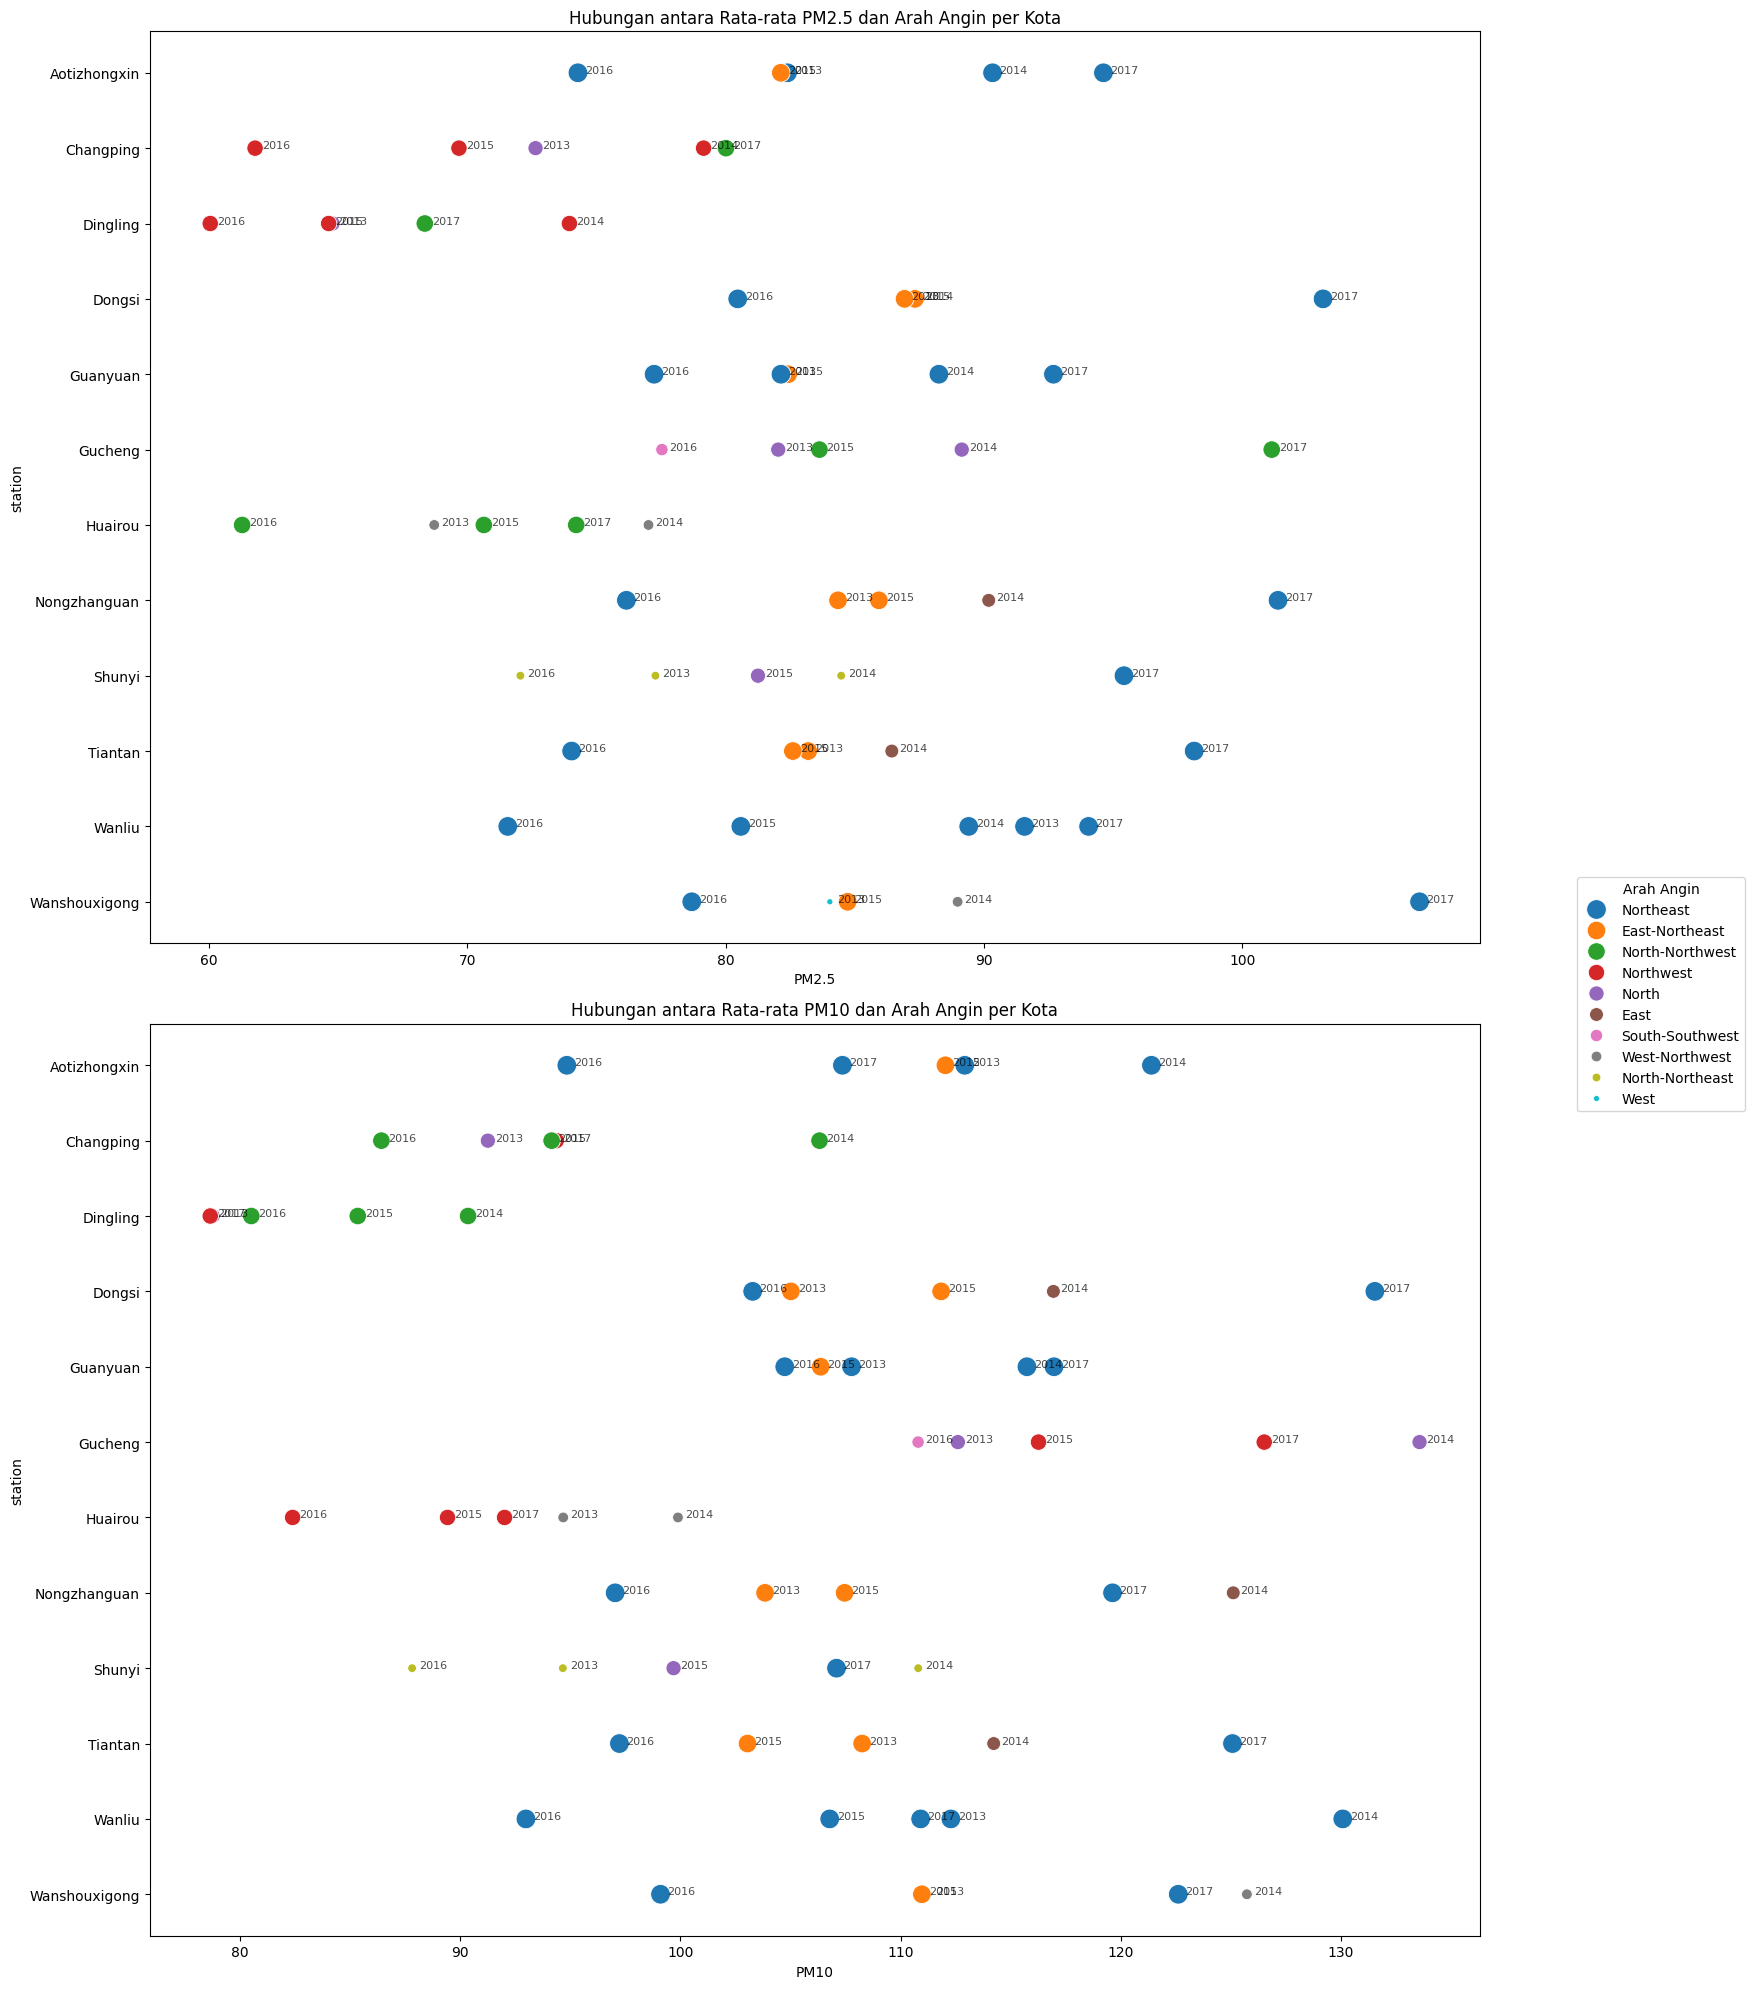

In [117]:
# Membuat figure dengan 2 subplot (2 baris, 1 kolom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Plot untuk PM2.5
sns.scatterplot(data=by_WindDirection_toPM25, x='PM2.5', y='station', hue='wd', size='wd', sizes=(20, 200), ax=ax1)
ax1.set_title('Hubungan antara Rata-rata PM2.5 dan Arah Angin per Kota')

# Menambahkan anotasi tahun untuk PM2.5
for idx, row in by_WindDirection_toPM25.iterrows():
    ax1.annotate(str(row['year']), 
                 (row['PM2.5'], row['station']),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=8,
                 alpha=0.7)

# Plot untuk PM10
sns.scatterplot(data=by_WindDirection_toPM10, x='PM10', y='station', hue='wd', size='wd', sizes=(20, 200), ax=ax2)
ax2.set_title('Hubungan antara Rata-rata PM10 dan Arah Angin per Kota')

# Menambahkan anotasi tahun untuk PM10
for idx, row in by_WindDirection_toPM10.iterrows():
    ax2.annotate(str(row['year']), 
                 (row['PM10'], row['station']),
                 xytext=(5, 0),
                 textcoords='offset points',
                 fontsize=8,
                 alpha=0.7)

# Mengatur legenda
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, title='Arah Angin', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Menghapus legenda dari masing-masing subplot
ax1.get_legend().remove()
ax2.get_legend().remove()

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

---

# Analisis Data Kualitas Udara

Analisis ini berfokus pada data polusi udara dari berbagai stasiun, dengan mencakup polutan utama seperti PM2.5, SO2, NO2, CO, dan O3. Kami mengamati tingkat polusi dibandingkan dengan batas aman serta korelasi arah angin.

---

## 1. Konsentrasi Polutan di Berbagai Stasiun

### PM2.5

- **Semua stasiun melebihi batas aman (35 µg/m³)**.
- Stasiun seperti *Wanliu* dan *Dongsi* melaporkan **PM2.5 di atas 80 µg/m³**, jauh melampaui batas aman.


## 2. Hubungan Antara PM10 dan Arah Angin

- Sama seperti PM2.5, stasiun seperti *Dongsi* dan *Guanyuan* menunjukkan tingkat **PM10** yang tinggi.
- **Arah Angin:** Stasiun dengan angin dari **Barat Laut** dan **Timur** cenderung memiliki konsentrasi PM10 yang lebih rendah.
  
---

## 3. Hubungan Antara PM2.5 dan Arah Angin

- **Stasiun dengan konsentrasi PM2.5 tertinggi** meliputi *Dongsi* dan *Guanyuan*.
- **Arah Angin:** Ada sedikit kecenderungan konsentrasi PM2.5 tinggi di sekitar stasiun yang anginnya berasal dari **Timur Laut**.
- Stasiun dengan angin **Barat Laut** (misalnya, *Dingling*) cenderung memiliki konsentrasi PM2.5 yang lebih rendah.
  
---
  
### SO2

- **Tingkat SO2 masih berada dalam batas aman (20 µg/m³)** di semua stasiun.
- Konsentrasi SO2 tertinggi ditemukan di *Guanyuan* (18.35 µg/m³), namun masih di bawah batas aman.
  
### NO2

- Stasiun seperti *Dongsi* dan *Guanyuan* **melebihi batas aman (40 µg/m³)** untuk NO2, dengan nilai hingga 66 µg/m³.
- Pengamatan penting adalah di *Tiantan*, di mana konsentrasi NO2 (66 µg/m³) lebih tinggi dibanding stasiun lainnya.

### CO

- **Tingkat CO masih jauh di bawah batas aman (4000 µg/m³)**.
- Stasiun *Dingling* menunjukkan konsentrasi CO rata-rata terendah (944.63 µg/m³).

### O3

- Semua stasiun melaporkan **tingkat O3 di bawah batas aman (100 µg/m³)**.
- Stasiun *Shunyi* dan *Tiantan* memiliki konsentrasi O3 tertinggi, tetapi tetap dalam batas aman.


---

## Analisis Lanjutan (Opsional)

Map Distribu PM 2.5

In [150]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from branca.element import Template, MacroElement

# Menghitung rata-rata PM2.5 untuk setiap stasiun
avg_pm25_by_station = bystation_PM.groupby('station')['PM2.5'].mean().reset_index()

# Membuat GeoDataFrame dengan lokasi stasiun dan rata-rata PM2.5
station_locations_df = pd.DataFrame({
    'station': list(station_locations.keys()),
    'latitude': [loc[0] for loc in station_locations.values()],
    'longitude': [loc[1] for loc in station_locations.values()]
})

# Menggabungkan data lokasi dengan rata-rata PM2.5
gdf = pd.merge(station_locations_df, avg_pm25_by_station, on='station', how='left')

# Mengonversi DataFrame ke GeoDataFrame
gdf_geo = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude), crs="EPSG:4326")

# Membuat peta dasar menggunakan Folium dengan tile yang minimalis
map_geospatial = folium.Map(location=[39.9042, 116.4074], zoom_start=10, tiles='CartoDB positron')

# Menambahkan marker ke peta dengan warna berdasarkan nilai rata-rata PM2.5
for _, row in gdf_geo.iterrows():
    pm25_avg = row['PM2.5']
    location = [row['latitude'], row['longitude']]
    station_name = row['station']
    
    # Tentukan warna berdasarkan nilai PM2.5
    if pd.isna(pm25_avg):
        color = 'gray'
    elif pm25_avg <= 12:
        color = 'green'
    elif pm25_avg <= 35.4:
        color = 'yellow'
    elif pm25_avg <= 55.4:
        color = 'orange'
    elif pm25_avg <= 150.4:
        color = 'red'
    elif pm25_avg <= 250.4:
        color = 'purple'
    else:
        color = 'black'
    
    # Menambahkan marker lingkaran dengan popup yang lebih informatif
    folium.CircleMarker(
        location=location,
        radius=8,
        popup=f"<b>{station_name}</b><br>PM2.5: {pm25_avg:.2f} µg/m³",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map_geospatial)

# Template HTML untuk menambahkan legenda sederhana ke peta
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 160px; height: 230px; 
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            ">
&emsp;<b>PM2.5 Levels</b><br>
&emsp;<i style="color:green;">&#9679;</i> 0 - 12 (Good)<br>
&emsp;<i style="color:yellow;">&#9679;</i> 12.1 - 35.4 (Moderate)<br>
&emsp;<i style="color:orange;">&#9679;</i> 35.5 - 55.4 (Unhealthy for SG)<br>
&emsp;<i style="color:red;">&#9679;</i> 55.5 - 150.4 (Unhealthy)<br>
&emsp;<i style="color:purple;">&#9679;</i> 150.5 - 250.4 (Very Unhealthy)<br>
&emsp;<i style="color:black;">&#9679;</i> ≥ 250.5 (Hazardous)<br>
&emsp;<i style="color:gray;">&#9679;</i> Data Not Available
</div>
"""

# Menambahkan legenda ke peta
legend = MacroElement()
legend._template = Template(legend_html)
map_geospatial.get_root().add_child(legend)

# Menyimpan peta ke file HTML agar bisa dilihat
map_geospatial.save('folium_map_geospatial_minimalist.html')

map_geospatial


## Conclusion

#  1. Bagaimana Kualitas udara di setiap provinsi / station dari tahun ke tahun ?
    - Pengawasan  ketat dari berbagai elemen untuk melakukan pengontrolan terhadap sumber pencemaran udara seperti industri, kendaran bermotor dsb yang menjadi sumbangsih tinggi indeks Kualitas udara.
    - Perlu nya penggunaan air puryifier dalam ruangan untuk menetralisir udara di dalam ruangan dan penggunaan masker ketika beraktifitas di luar ruangan.


# 2. Bagaimana kadar polutan yang tersebar, serta dari mana sumber nya ?
    - NO2 menjadi polutan yang memiliki kadar tinggi dan melebihi batas aman untuk kesehatan yang dimana secara umum NO2 dihasilkan dari proses pembakaran, dari sini harus ada nya tindakan ada kebijakan dalam penggunaan  bahan bakar yang lebih ramah lingkungan, dan kebijakan dalam pembakaran sampah  yang lebih baik. 


# 3.  Apa korelasi antara arah angin dengan  kualitas udara ?
    -  Arah angin yang bertiup bisa menjadi acuan dari mana sumber polutan berasal, dari sumber inilah harus  dilakukan penelitian lebih lanjut dan Pengawasan ketat untuk pemberian tindakan yang sesuai

In [1]:
# pip freeze > requirements.txt
